## Question 1 using College.csv data file

In [106]:
#1a - Using the pandas library, read the csv data file and create a data-frame called college.

import pandas as pd
college = pd.read_csv('College.csv')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [107]:
#1b - Change the Private variable from a categorical variable to a numerical variable. 
#That is, change Yes to 1 and No to 0.

college['Private'].replace(['Yes', 'No'], [1, 0], inplace = True)
college.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [108]:
#1c - split the data into train (80%) and test (20%). Predictor variables are: Private, F.Undergrad, P.Undergrad, 
#Outstate, Room.Board, Books, Personal, S.F.Ratio and Grad.Rate. Target variable is Apps

from sklearn.model_selection import train_test_split

X = college[['Private', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 
             'S.F.Ratio', 'Grad.Rate']]
Y = college['Apps']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [109]:
#1d - Using the train dataset, MinMaxScaler, and make pipeline, build a linear regression model.
#After that, use this model to predict on the test dataset. Report the MSE of this model.

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

scaler = MinMaxScaler()

#Build model
LinReg_md = make_pipeline(MinMaxScaler(), LinearRegression()).fit(X_train, Y_train)

#Predicting on test
LinReg_pred = LinReg_md.predict(X_test)

#Print MSE
print(f"The mse of the model is {mean_squared_error(Y_test, LinReg_pred)}")

The mse of the model is 9360060.657892555


In [110]:
#1e - Using the train dataset, MinMaxScaler, and Pipeline, build a ridge regression model

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline
import numpy as np

scaler = MinMaxScaler()

#Optimal lambda via cross-validation using 5 folds
ridge_ = RidgeCV(alphas = np.linspace(0.001, 100, num = 100), cv = 5).fit(X_train, Y_train)

#Exract lambda
lambda_ = ridge_.alpha_

#Build model
ridge_md = make_pipeline(MinMaxScaler(), Ridge(alpha = lambda_)).fit(X_train, Y_train)

#Predict
ridge_pred = ridge_md.predict(X_test)

#MSE
print(f"The mse of the model is {mean_squared_error(Y_test, ridge_pred)}")

The mse of the model is 13792748.733899673


In [111]:
#1f - Using the train dataset, MinMaxScaler, and Pipeline, build a LASSO regression model

from sklearn.linear_model import Lasso, LassoCV

scaler = MinMaxScaler()

#Optimal lambda via cross-validation using 5 folds
lasso_ = LassoCV(alphas = np.linspace(0.001, 100, num = 100), cv = 5).fit(X_train, Y_train)

#Extract Lambda
lambda_ = lasso_.alpha_

#Build model
lasso_md = make_pipeline(MinMaxScaler(), Lasso(alpha = lambda_)).fit(X_train, Y_train)

#Predict
lasso_pred = lasso_md.predict(X_test)

#MSE
print(f"The mse of the model is {mean_squared_error(Y_test, lasso_pred)}")

The mse of the model is 9360086.40883266


### 1g - Using the above, What model would you use to predict the number of applications that a university receives?

I would use the lasso model since the mse is slightly lower than the other 2 models

## Question 2 using the churn-bigml-80.csv and churn-bigml-20.csv data files

In [112]:
#2a - Using the pandas library, read the csv data file and create two data-frames
#called: telecom_train (for churn-bigml-80.csv) and telecom_test (for churn-bigml-20.csv)

telecom_train = pd.read_csv('churn-bigml-80.csv')
telecom_test = pd.read_csv('churn-bigml-20.csv')
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [113]:
#2b - change categorical variables to numerical in both train and test dataframes and add new variable

#Churn
telecom_train['Churn'].replace([True, False], [1, 0], inplace = True)
telecom_test['Churn'].replace([True, False], [1, 0], inplace = True)

#International_plan
telecom_train['International_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)
telecom_test['International_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)

#Voice mail plan
telecom_train['Voice_mail_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)
telecom_test['Voice_mail_plan'].replace(['Yes', 'No'], [1, 0], inplace = True)

#total_charge - new variable
telecom_train = telecom_train.assign(total_charge = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge'])
telecom_test = telecom_test.assign(total_charge = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge'])

In [114]:
telecom_train.head(1)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,75.56


In [115]:
telecom_test.head(1)

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,total_charge
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,0,73.32


In [116]:
#2c - In both data-frames telecom train and telecom test, only keep the following variables: Account length, 
#International plan, Voice mail plan, total charge, Customer service calls, and Churn.

telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 'Churn']]

In [118]:
#2d - Input variables: Account length, International plan, Voice mail plan, total charge, Customer service calls
#Target variable: Churn

#Input and target variables
X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

#Store model coefficients here
coef = list()

#Repeat 1000 times
for i in range (0,1000):
    
    #split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, stratify = Y)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    #extract lambda
    lasso_cv = LassoCV(cv = 5).fit(X_train, Y_train)
        
    #Build model
    lasso_md = Lasso(alpha = lasso_cv.alpha_).fit(X_train, Y_train)
    
    #store estimated coefficients
    coef.append(lasso_md.coef_)
    
#put into dataframe
coef_df = pd.DataFrame(coef)  
coef_df

,0,1,2,3,4
0,0.047523,0.329222,-0.078674,0.466143,0.508094
1,0.000000,0.296706,-0.086626,0.494900,0.560266
2,0.038718,0.330041,-0.071281,0.475481,0.522643
3,-0.009534,0.313915,-0.072452,0.539986,0.478808
4,0.008564,0.302316,-0.072970,0.525558,0.489970
...,...,...,...,...,...
995,0.043387,0.290180,-0.073669,0.478097,0.570917
996,0.053058,0.308130,-0.083307,0.492226,0.504815
997,0.023072,0.322258,-0.087604,0.544968,0.470332
998,-0.000000,0.304905,-0.075516,0.427219,0.527811


In [119]:
#We want to Remove the variables whose estimated coefficients is 0 more than 200 times

zero_totals = (coef_df == 0).sum()
zero_totals

0    245
1      0
2      0
3      0
4      0
dtype: int64

From the above, the column with more than 200 zeros is Account_length. So we remove it

In [120]:
telecom_train = telecom_train.drop(['Account_length'], axis = 1)
telecom_test = telecom_test.drop(['Account_length'], axis = 1)

In [121]:
telecom_train.head(1)

,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn
0,0,1,75.56,1,0


In [122]:
#2e - Churn is target variable, rest are input variables

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

X = telecom_train.drop(columns = ['Churn'], axis = 1)
Y = telecom_train['Churn']

#conduct k-folds splitting of the data taking into account of the proportion of 0s and 1s in the data using the StratifiedKFold function
kfold_ = StratifiedKFold(n_splits = 5, shuffle = True)

#Store results here
md1_ = list()
md2_ = list()
md3_ = list()
md4_ = list()

for train_ix, test_ix in kfold_.split(X, Y):
    
    #Split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    #transform data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ### Model 1 - liblinear & l1 penalty ###
    md1 = LogisticRegression(solver = 'liblinear', penalty = 'l1').fit(X_train, Y_train)
    
    #Predict
    md1_pred = md1.predict_proba(X_test)[:,1]
    
    #10% cutoff
    md1_label = np.where(md1_pred < 0.10, 0,1)
    
    #Find recall
    md1_recall = recall_score(Y_test, md1_label)
    md1_.append(md1_recall)

    
    ### Model 2 - liblinear & l2 penalty ###
    md2 = LogisticRegression(solver ='liblinear', penalty ='l2').fit(X_train, Y_train)
                        
    #Predict
    md2_pred = md2.predict_proba(X_test)[:,1]
    
    #10% cutoff
    md2_label = np.where(md2_pred < 0.10, 0,1)
    
    #Find recall
    md2_recall = recall_score(Y_test, md2_label)
    md2_.append(md2_recall)

    
    ### Model 3 - saga and l1 penalty ###
    md3 = LogisticRegression(solver ='saga', penalty ='l1').fit(X_train, Y_train)
                        
    #Predict
    md3_pred = md3.predict_proba(X_test)[:,1]
    
    #10% cutoff
    md3_label = np.where(md3_pred < 0.10, 0,1)
    
    #Find recall
    md3_recall = recall_score(Y_test, md3_label)
    md3_.append(md3_recall)

    
    ### Model 4 - saga and l2 penalty ###
    md4 = LogisticRegression(solver ='saga', penalty ='l2').fit(X_train, Y_train)
                        
    #Predict
    md4_pred = md4.predict_proba(X_test)[:,1]
    
    #10% cutoff
    md4_label = np.where(md4_pred < 0.10 , 0,1)
    
    #Find recall
    md4_recall = recall_score(Y_test, md4_label)
    md4_.append(md4_recall)

md1_avg = np.mean(md1_)
md1_.append(md1_avg)
md2_avg = np.mean(md2_)
md2_.append(md2_avg)
md3_avg = np.mean(md3_)
md3_.append(md3_avg)
md4_avg = np.mean(md4_)
md4_.append(md4_avg)

#Print recalls
print('Model 1 recall: ', np.mean(md1_))
print('Model 2 recall: ', np.mean(md2_))
print('Model 3 recall: ', np.mean(md3_))
print('Model 4 recall: ', np.mean(md4_))

Model 1 recall:  0.8631368631368631
Model 2 recall:  0.8890442890442891
Model 3 recall:  0.8605394605394606
Model 4 recall:  0.8864468864468865


In [123]:
#2f - Repeat part e 100 times and create a visualization of recall

#Churn is target variable. Everything else is input variable
X = telecom_train.drop(columns = ['Churn'], axis = 1)
Y = telecom_train['Churn']

md1_res = list()
md2_res = list()
md3_res = list()
md4_res = list()

for i in range(0, 100):

    #Store results here
    md1_ = list()
    md2_ = list()
    md3_ = list()
    md4_ = list()

    #conduct k-folds splitting of the data taking into account of the proportion of 0s and 1s in the data using the StratifiedKFold function
    kfold_ = StratifiedKFold(n_splits = 5, shuffle = True)

    for train_ix, test_ix in kfold_.split(X, Y):
    
        #Split data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
        #transform data
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
    
        ### Model 1 - liblinear & l1 penalty ###
        md1 = LogisticRegression(solver = 'liblinear', penalty = 'l1').fit(X_train, Y_train)
    
        #Predict
        md1_pred = md1.predict_proba(X_test)[:,1]
    
        #10% cutoff
        md1_label = np.where(md1_pred < 0.10, 0,1)
    
        #Find recall
        md1_recall = recall_score(Y_test, md1_label)
        md1_.append(md1_recall)

    
        ### Model 2 - liblinear & l2 penalty ###
        md2 = LogisticRegression(solver ='liblinear', penalty ='l2').fit(X_train, Y_train)
                        
        #Predict
        md2_pred = md2.predict_proba(X_test)[:,1]
    
        #10% cutoff
        md2_label = np.where(md2_pred < 0.10, 0,1)
    
        #Find recall
        md2_recall = recall_score(Y_test, md2_label)
        md2_.append(md2_recall)

    
        ### Model 3 - saga and l1 penalty ###
        md3 = LogisticRegression(solver ='saga', penalty ='l1').fit(X_train, Y_train)
                        
        #Predict
        md3_pred = md3.predict_proba(X_test)[:,1]
    
        #10% cutoff
        md3_label = np.where(md3_pred < 0.10, 0,1)
    
        #Find recall
        md3_recall = recall_score(Y_test, md3_label)
        md3_.append(md3_recall)

    
        ### Model 4 - saga and l2 penalty ###
        md4 = LogisticRegression(solver ='saga', penalty ='l2').fit(X_train, Y_train)
                        
        #Predict
        md4_pred = md4.predict_proba(X_test)[:,1]
    
        #10% cutoff
        md4_label = np.where(md4_pred < 0.10 , 0,1)
    
        #Find recall
        md4_recall = recall_score(Y_test, md4_label)
        md4_.append(md4_recall)

    md1_avg = np.mean(md1_)
    md1_res.append(md1_avg)

    md2_avg = np.mean(md2_)
    md2_res.append(md2_avg)

    md3_avg = np.mean(md3_)
    md3_res.append(md3_avg)

    md4_avg = np.mean(md4_)
    md4_res.append(md4_avg)

#Print recalls
print('Model 1 recall: ', np.mean(md1_res))
print('Model 2 recall: ', np.mean(md2_res))
print('Model 3 recall: ', np.mean(md3_res))
print('Model 4 recall: ', np.mean(md4_res))

Model 1 recall:  0.8746047286047286
Model 2 recall:  0.8984005994005994
Model 3 recall:  0.8717166167166168
Model 4 recall:  0.8868265068265069


Text(0, 0.5, 'Recall')

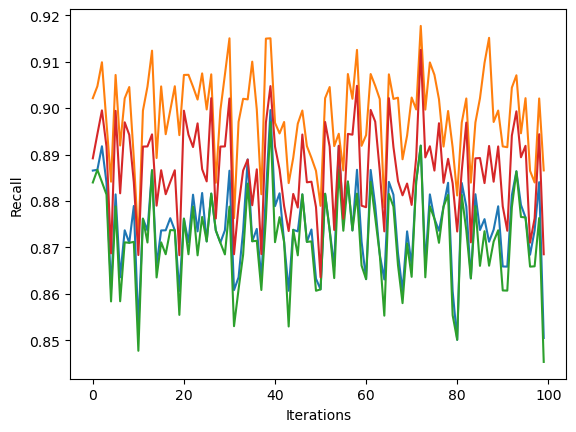

In [128]:
#Create a visualization that shows the recall value for each of the models at each iteration

import seaborn as sns
import matplotlib.pyplot as plt

iterations = np.linspace(0,99, num=100)
plt.plot(iterations, md1_res, label = 'Model 1')
plt.plot(iterations, md2_res, label = 'Model 2')
plt.plot(iterations, md3_res, label = 'Model 3')
plt.plot(iterations, md4_res, label = 'Model 4')
plt.xlabel('Iterations')
plt.ylabel('Recall')

From the above, I would use model 2 for liblinear and model 4 for saga since the recall is higher

In [129]:
### 2g ###

#Input and target variables
X_train = telecom_train.drop(columns = ['Churn'], axis = 1)
Y_train = telecom_train['Churn']    
X_test = telecom_test.drop(columns = ['Churn'], axis = 1)
Y_test = telecom_test['Churn']   

#Transforming data
scaler = MinMaxScaler()


### Model 2 - liblinear & l2 penalty ###
md2 = make_pipeline(MinMaxScaler(), LogisticRegression(solver ='liblinear', penalty ='l2')).fit(X_train, Y_train)
                        
#Predict
md2_pred = md2.predict_proba(X_test)[:,1]
    
#10% cutoff
md2_label = np.where(md2_pred < 0.10, 0,1)
    
#Find recall
md2_recall = recall_score(Y_test, md2_label)


### Model 4 - saga and l2 penalty ###
md4 = make_pipeline(MinMaxScaler(), LogisticRegression(solver ='saga', penalty ='l2')).fit(X_train, Y_train)
                        
#Predict
md4_pred = md4.predict_proba(X_test)[:,1]
    
#10% cutoff
md4_label = np.where(md4_pred < 0.10 , 0,1)
    
#Find recall
md4_recall = recall_score(Y_test, md4_label)


print('Model 2 recall: ', md2_recall)
print('Model 4 recall: ', md4_recall)

Model 2 recall:  0.9157894736842105
Model 4 recall:  0.8947368421052632


From the above, I would use model 2 to predict churn since the recall is higher. 